IR_Fusion based Face Recognition Transfomer Deep Network
----------------------------

'''
Research Reference:
- ECAPA-TDNN - https://github.com/TaoRuijie/ECAPA-TDNN
- face transformer for recognition -  https://arxiv.org/pdf/2103.14803.pdf
- Paper face transformer for recognition - https://github.com/zhongyy/Face-Transformer

Datasets in use
--------------------------
IR_RGB Combo data set used - http://tdface.ece.tufts.edu/downloads/TD_IR_RGB_CROPPED/
in other test --
IR Facial Dataset source:
http://tdface.ece.tufts.edu/downloads/TD_IR_A/
http://tdface.ece.tufts.edu/downloads/TD_IR_E/


Coded everything in multiple .py files, putting in jupyter file just for showcase purpose
-Not Adding Training code here

In [9]:
import torch

#Importing project Modules
import Test_Model
import Utils
from prepare_ds import prepare_ds_source
from Load_Dataset import load_IR_RGB_dataset
from Utils import unique_elements_from_lists
#from Test_Model import evaluate_test_data
from Test_Model import evaluate_TP_on_test_data, evaluate_TN_on_test_data
from ROC_curve_calculation import filter_train_test
from ROC_curve_calculation import find_best_threshold


Parameters

In [10]:

rgb_source = 'data/full_train/RGB'
ir_source = 'data/full_train/IR'
data_source_file = 'ir_rgb_label_mapping.csv'

batch_size = 2 #For evaluation ##12 people

Generate Data_Source_File - Run it only one time to initialise

In [11]:
#Generate Data_Source_File - Run it only one time to initialise
#prepare_ds_source(data_source_file, rgb_source, ir_source)


Load data and filter train and test
100 - Model is Trained on 100 people
12 - Model is Test on 12 people

In [12]:
train_loader, test_loader = load_IR_RGB_dataset(rgb_source=rgb_source, ir_source=ir_source, 
                                                data_source_file=data_source_file, batch_size=batch_size, rgb_transform=Utils.rgb_transform, ir_transform=Utils.ir_transform)


test_labels, train_labels =  filter_train_test(train_loader, test_loader)


Train Labels-------- :  tensor([  1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113])
Test Labels---------- :  tensor([ 9, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
Overlapping Data : tensor([87])
Remove overllaping element from train labels and remove bad data
Filtered test labels : tensor([ 9, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99])



Load the model and set is to EVAL mode

In [13]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device, f"({torch.cuda.get_device_name(device)})" if torch.cuda.is_available() else "")

model = torch.load('Face_Fusion_ViT_tune_model.pth').to(device)
model.eval()


Using device:  cuda (NVIDIA GeForce RTX 3080 Ti Laptop GPU)


FusionVisionFaceTransfomer(
  (patch_embed): Fusion_PatchEmbed(
    (proj): Linear(in_features=768, out_features=768, bias=True)
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (encoder_blocks): ModuleList(
    (0-11): 12 x Encoder(
      (norm1): LayerNorm((768,), eps=6, elementwise_affine=True)
      (attention): MultiheadAttention(
        (q_mappings): ModuleList(
          (0-11): 12 x Linear(in_features=64, out_features=64, bias=True)
        )
        (k_mappings): ModuleList(
          (0-11): 12 x Linear(in_features=64, out_features=64, bias=True)
        )
        (v_mappings): ModuleList(
          (0-11): 12 x Linear(in_features=64, out_features=64, bias=True)
        )
        (softmax): Softmax(dim=-1)
      )
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): MLP(
        (fcLayer1): Linear(in_features=768, out_features=3072, bias=True)
        (activation): GELU(approximate='none')
        (fcLayer2): Linear(in_features=3072, out_feature

Find the Best Threshold

Ground Truth : tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])
Pred  : tensor([ 0.8618,  0.9980,  0.9989,  0.9983,  0.9977,  0.9981,  0.8869,  0.9997,
         0.9983,  0.7419,  0.8523,  0.8063,  0.0452,  0.0835,  0.0440,  0.0265,
         0.0157, -0.0267, -0.0205,  0.0238,  0.0339, -0.0151, -0.0716,  0.0776])
Thresholds :  [       inf  0.9997198  0.7418771 -0.0715967]


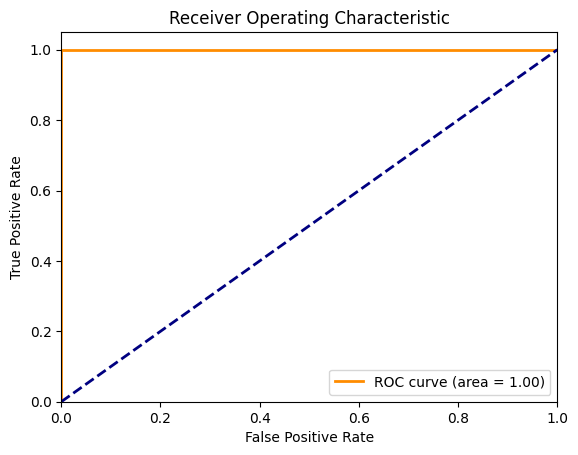

Mid :  2
Best Thresold :  0.7418771


In [14]:

threshold = find_best_threshold(test_labels, model, device, batch_size)

Eval the Model for Positives and Negative

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


**********************
Evaluating for person :  9
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 9


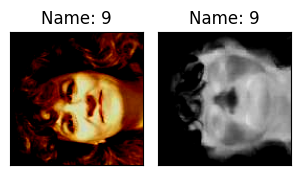

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 9


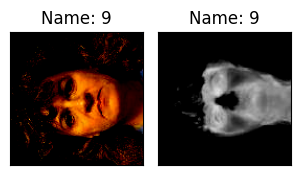

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.8618], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  88
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 88


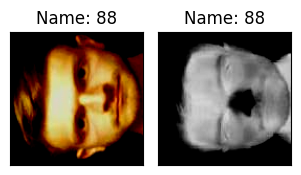

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 88


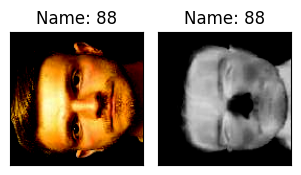

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.9980], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  89
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 89


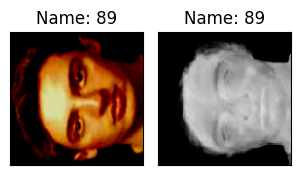

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 89


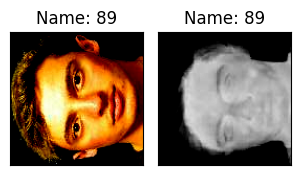

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.9989], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  90
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 90


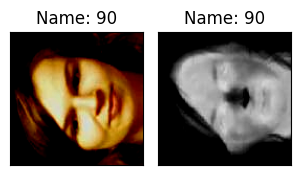

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 90


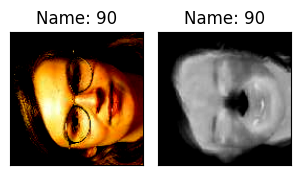

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.9983], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  91
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input : 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 torch.Size([1, 768])
labels : 91


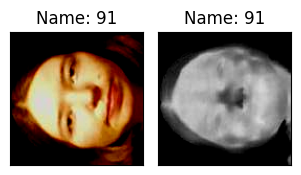

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 91


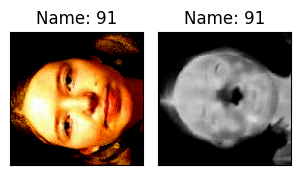

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.9977], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  92
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 92


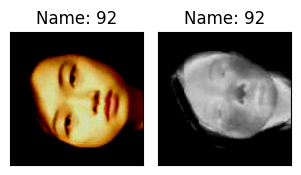

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 92


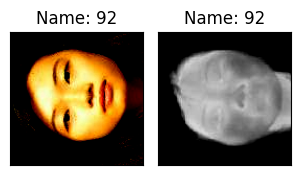

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.9981], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  93
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 93


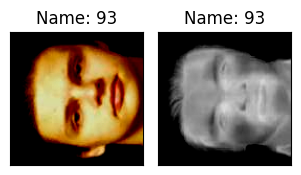

Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 93


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


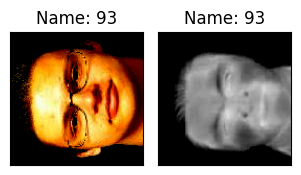

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.8869], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  94
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 94


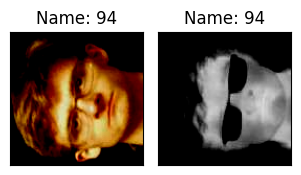

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 94


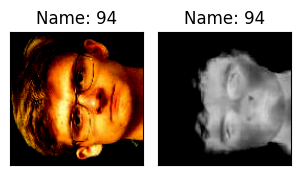

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.9997], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  95
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 95


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


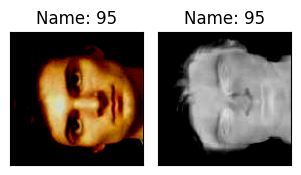

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 95


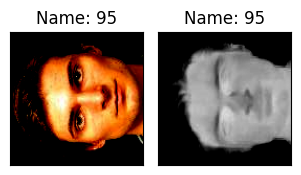

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.9983], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  97
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 97


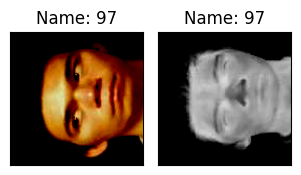

Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 97


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


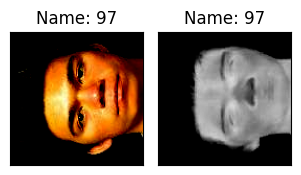

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.7419], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  98
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 98


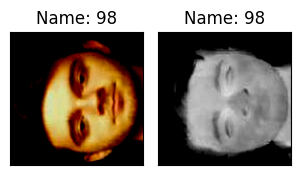

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 98


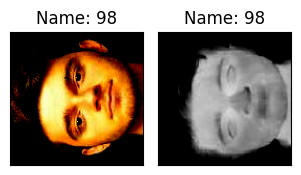

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.8523], device='cuda:0')
Authenticated :  True
**********************
Evaluating for person :  99
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input : 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 torch.Size([1, 768])
labels : 99


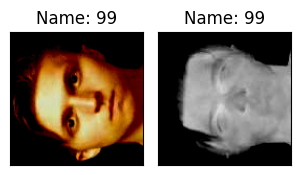

Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 99


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


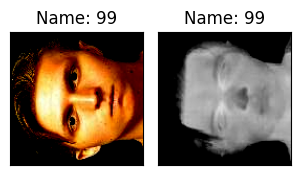

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.8063], device='cuda:0')
Authenticated :  True
TP - TRUE POSITIVE FOR TEST DATASET :  12  -  100.0
**********************
Evaluating for person :  9  with person :  99
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 9


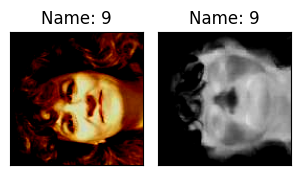

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 99


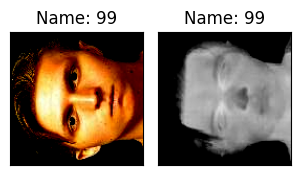

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.0452], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  88  with person :  98
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 88


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


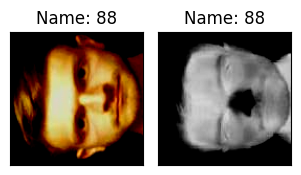

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 98


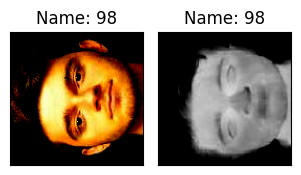

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.0835], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  89  with person :  97
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 89


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


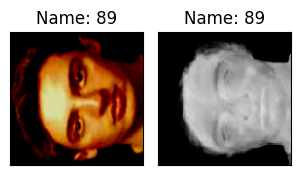

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 97


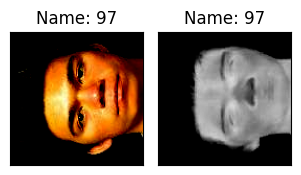

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.0440], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  90  with person :  95
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 90


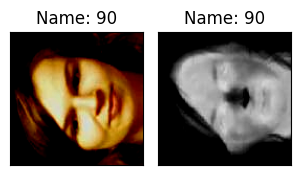

Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 95


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


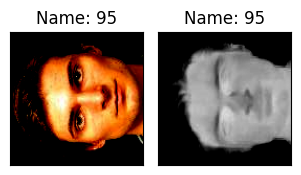

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.0265], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  91  with person :  94
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 91


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


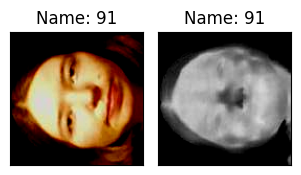

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 94


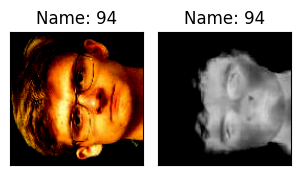

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.0157], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  92  with person :  93
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 92


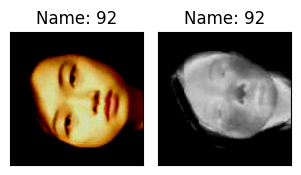

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 93


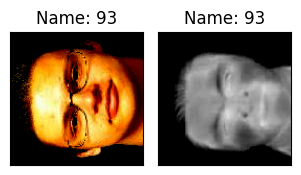

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([-0.0267], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  93  with person :  92
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 93


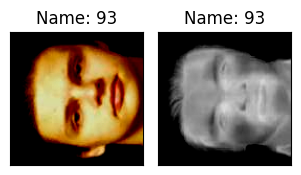

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 92


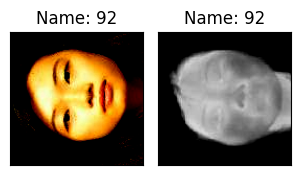

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([-0.0205], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  94  with person :  91
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 94


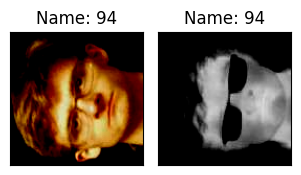

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 91


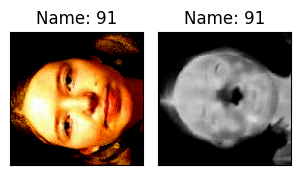

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.0238], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  95  with person :  90
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 95


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


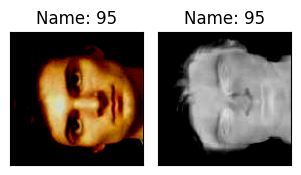

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 90


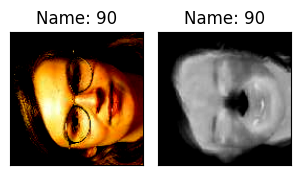

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.0339], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  97  with person :  89
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])
Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 97


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


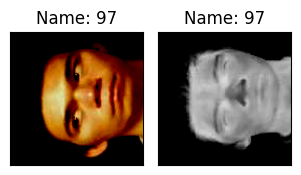

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 89


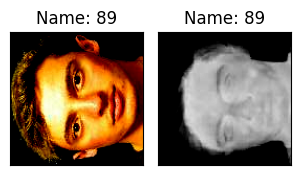

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([-0.0151], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  98  with person :  88
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 98


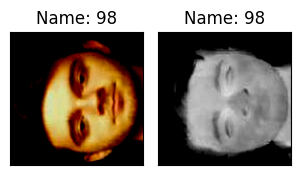

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 88


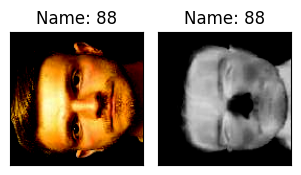

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([-0.0716], device='cuda:0')
Authenticated :  False
**********************
Evaluating for person :  99  with person :  9
shapes : x_rgb :  torch.Size([1, 3, 128, 128])  x_ir : torch.Size([1, 3, 128, 128])  xo_rgb :  torch.Size([1, 3, 128, 128])  xo_ir : torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : input :  torch.Size([1, 768])
labels : 99


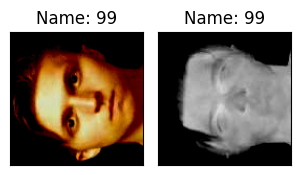

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Face Embedding after transformer : original :  torch.Size([1, 768])
labels : 9


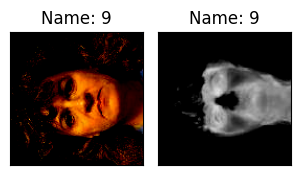

Best Selected Thresold  :  tensor(0.7419)
Similarity :  tensor([0.0776], device='cuda:0')
Authenticated :  False
TN - TRUE NEGATIVE FOR TEST DATASET :  12  -  100.0


In [15]:
#Test The model for test labels
result_TP = evaluate_TP_on_test_data(test_labels, model, threshold, device=device, batch_size=2)
print('TP - TRUE POSITIVE FOR TEST DATASET : ', len(test_labels), ' - ', result_TP)

result_TN = evaluate_TN_on_test_data(test_labels, model, threshold, device=device, batch_size=2)
print('TN - TRUE NEGATIVE FOR TEST DATASET : ', len(test_labels), ' - ', result_TN)


Print the stats

In [16]:
print('\n\n***************************\n')
print('Trained on ',len(train_labels),' People')
print(train_labels)
print('Evaluated on ',len(test_labels),' different People (not in train set)')
print(test_labels)

TP = result_TP
TN = result_TN 
FP = 100 - TP
FN = 100 - TN

print('TP - ', result_TP)
print('TN - ', result_TN)
print('FP - ', FP)
print('FN - ', FN)

accuracy = (TP + TN)/(TP+TN+FN+FP)
accuracy = accuracy*100
print('Accuracy : ', accuracy,' %')

precision = TP/(TP+FP)
print('Precision : ',precision)

recall = TP/(TP+FN)
print('Recall  : ', recall)


F1 = (2*precision*recall)/(precision+recall)
print('F1 score : ', F1 )




***************************

Trained on  99  People
tensor([  1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113])
Evaluated on  12  different People (not in train set)
tensor([ 9, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99])
TP -  100.0
TN -  100.0
FP -  0.0
FN -  0.0
Accuracy :  100.0  %
Precision :  1.0
Recall  :  1.0
F1 score :  1.0


****************************** THE END ************************